# Теоретична част

Имаме следната задача на Коши

$$
\begin{cases}
y'=f(y, x)\\
y(x_0) = y_0
\end{cases}
$$

Интегрираме уравнението формално, тоест в граници от $x_0$ до $x$.

$$\displaystyle \int \limits_{x_0}^{x} y'(t) \space dt = \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

$$\displaystyle \int \limits_{x_0}^{x} \space dy(t) = \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

$$\displaystyle y(x) - y(x_0) = \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

$$\displaystyle y(x) = y(x_0) + \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

$$\displaystyle y(x) = y_0 + \int \limits_{x_0}^{x} f(y(t), t) \space dt$$

Така сведохме задачата на Коши до *интегрално уравнение*. Това означава, че вече вместо да имаме уравнение с $y$ и $y'$, имаме уравнение само с $y$. Това ни позволява да направим последователни приближения, започвайки с $y_0$ от задачата на Коши и обща форма, която се задава по следния начин:

$$\displaystyle y_{i+1}(x) = y_0 + \int \limits_{x_0}^{x} f(y_{i}(t), t) \space dt$$

# Задача

Дадена е следната задача на Коши

$$
\begin{cases}
y'=y^2-2x\\
y(1) = 3
\end{cases}
$$

Да се намерят първите 3 приближения с метода на Пикар аналитично.

Да се начертаят с MATLAB/Octave в една координатна система графиките на третото и на петото проближение на задачата на Коши по метода на Пикар в интервала $x\in[0, 1]$.

# Аналитично решение

$$
\begin{cases}
y' = y^2 - 2x, \\
y(1) = 3.
\end{cases}
$$

Интегралното уравнение по метода на Пикар е:

$$
\displaystyle y_{i+1}(x) = y_0 + \int \limits_{x_0}^{x} (y_i^2(t)-2t) \space dt
$$

$$
\displaystyle y_{i+1}(x) = 3 + \int \limits_{1}^{x} (y_i^2(t)-2t) \space dt
$$

### Първо приближение:

$$
y_0 = 3.
$$

### Второ приближение:

$$
y_1 = 3 + \int \limits_{1}^{x} (y_0^2 - 2t) \space dt = 3 + \int \limits_{1}^{x} (9 - 2t) \space dt.
$$

$$
y_1 = 3 + \left[ 9t - t^2 \right]_{1}^{x} = 3 + (9x - x^2 - 9 + 1).
$$

$$
y_1 = 9x - x^2 - 5.
$$

### Трето приближение:

$$
y_2 = y_0 + \int \limits_{1}^{x} (y_1^2 - 2t) \space dt.
$$

Разкриваме скобите:

$$
y_1^2 = (9t - t^2 - 5)^2 = 81t^2 - 18t^3 + t^4 - 90t + 10t^2 + 25.
$$

$$
= t^4 - 18t^3 + 91t^2 - 90t + 25.
$$

Следователно:

$$
y_2 = 3 + \int \limits_{1}^{x} (t^4 - 18t^3 + 91t^2 - 92t + 25) \space dt.
$$

$$
= 3 + \left[ \frac{t^5}{5} - \frac{18t^4}{4} + \frac{91t^3}{3} - \frac{92t^2}{2} + 25t \right]_{1}^{x}.
$$

$$
= 3 + \left( \frac{x^5}{5} - \frac{9x^4}{2} + \frac{91x^3}{3} - 46x^2 + 25x \right) - \left( \frac{1}{5} - \frac{9}{2} + \frac{91}{3} - 46 + 25 \right).
$$

След пресмятанията:

$$
y_2(x) = 3 + \frac{x^5}{5} - \frac{9x^4}{2} + \frac{91x^3}{3} - 46x^2 + 25x - \frac{151}{30}.
$$

In [33]:
warning('off','all');
pkg load symbolic;
graphics_toolkit("gnuplot");

y_0(x) = (symfun) 3
x_0 = 1
y_i(x) = (symfun) 3
f(x, y) = (symfun)

          2
  -2*x + y 



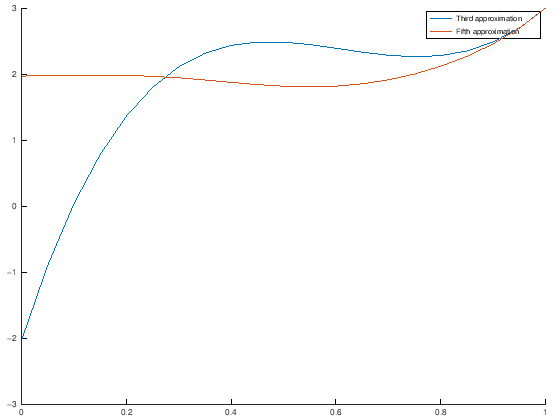

In [34]:
syms x y_0 y_i y_i_plus_one f y

y_0(x) = 3

x_0 = 1

y_i(x) = y_0(x)

f(x, y) = y^2 - 2*x

hold on

x_axis = 0:0.05:1;

for counter = 1:5
    if counter == 3 || counter == 5
        plot(x_axis, double(subs(y_i, x, x_axis)))
    end

    y_i_plus_one(x) = y_0(x) + int(f(x, y_i), x, x_0, x);

    y_i = y_i_plus_one;
end

legend('Third approximation', 'Fifth approximation')